## LAB0 Simulation to Demonstrate the Type II Error and the Power Anaysis of the A/B Test 

In a A/B test hypothesis testing situation in order to understand the power analysis, it is important to understand three related concepts: significance level, Type I/II errors and the effect size.

In hypothesis testing, significance level (often denoted as Greek letter alpha) is the probability of rejecting the null hypothesis (H0), which it is usually conventional wisdom. A metric closely related to the significance level is the p-value, which is the probability of obtaining a result at least as extreme (a result against the null hypothesis), even if the H0 was true. What does that mean in practice? In case of drawing a random sample from a population, 

It is always possible that the observed extreme/ unlikely outcome would have occurred only due to sampling error.
The result of an experiment (or for example a linear regression coefficient) is statistically significant when the associated p-value is smaller than the chosen probability. The significance level, meaning the probability allowed in the experiment that wrongly rejects the conventional wisdom which is true, should be specified before setting up the study and depends on the field of research/business needs. 

The second concept worth mentioning is the types of errors we can commit while statistically testing a hypothesis. When we reject a true H0 we are talking about a Type I error (false positive). This is also another error connected to the significance level (mentioned above). The other case occurs when we fail to reject a false H0, which is considered to be a Type II error (false negative). 

The last concept to consider it the effect size, related to the population which is the quantified magnitude of Type I and Type II errors present in the sample


### Programme for the Power Analysis

### Calculate Type II Error 

##### Assume you draw sample size of 100 from a normal distributions with one mean of 0.2 with variances of 1. 

Based on the sample, one run tests of 5% signifinance against level the null hypothesis of the mean is zero. Since the mean is 0.1, the hull hypthesis mean is zero, it should be rejected. But to sampling, it is possible that it cannot be rejected.

Code below is to simulate 10000 sample to estimate the probability of the test "not" to be rejected (the false negative), the type II error.

In [1]:
# Type II Error and the Size of the Effect (A clarity rather than speed of execution)

import numpy as np

import scipy.stats

n_per_group = 100
# effect size = 0.2
group_means = [0.0, 0.2]
group_sigmas = [1.0, 1.0]

# there are only 2 groups
n_groups = len(group_means)

# number of simulations
n_sims = 100000

# definite a file to store the p value for each simulation
sim_p = np.empty(n_sims)
sim_p.fill(np.nan)

for i_sim in range(n_sims):

    data = np.empty([n_per_group, n_groups])
    data.fill(np.nan)

    # simulate the data for this 'experiment'
    for i_group in range(n_groups):

        data[:, i_group] = np.random.normal(
            loc=group_means[i_group],
            scale=group_sigmas[i_group],
            size=n_per_group
        )

    result = scipy.stats.ttest_ind(data[:, 0], data[:, 1])

    sim_p[i_sim] = result[1]

# number of simulations where the null was rejected
n_rej = np.sum(sim_p < 0.05)

prop_rej = 1 - (n_rej / float(n_sims))

print("TYPE II ERROR: ", prop_rej)

TYPE II ERROR:  0.71035


### Statistical power

The key concepts related to power analysis, statistical power, of a hypothesis test is simply the probability that the given test correctly rejects the null hypothesis (which means the somehow as accepting the H1), when the alternative is in fact true.

Higher statistical power of an experiment means lower probability of committing a Type II error. It also means higher probability of detecting an effect when there is an effect to detect (true positive). This can be illustrated by the following formula:

Power = Pr(reject H0 | H1 is true) = 1 - Pr(fail to reject H0 | H0 is false) = 1 - Type II Error

In practice, results from experiments with too little power will lead to wrong conclusions, which in turn will affect the decision-making process. That is why only results with an acceptable level of power should be taken into consideration. It is quite common to design experiments with power level of 80%, which translates to a 20% probability of committing a Type II error.

The idea of power analysis can be brought down to the following: by having defining three out of four metrics, we estimate the missing one. This comes in handy in two ways:

In designing an experiment, we can assume what "level of significance" (alpha), "power" (1- beta) and "effect size" is acceptable to us and — as a result — estimate "how big a sample" we need to gather for such an experiment to yield valid results or when validate an experiment, one can see if, given the used sample size, effect size and significance level, what is the probability of the level of a Type II error is acceptable from the business 

In [2]:
# Power vs. number of Size Effect (A quick execution)

import numpy as np

import scipy.stats

n_per_group = 100

# effect size = 0.2
group_means = [0.0, 0.2]
group_sigmas = [1.0, 1.0]

n_groups = len(group_means)

# number of simulations
n_sims = 1000000

data = np.empty([n_sims, n_per_group, n_groups])
data.fill(np.nan)

for i_group in range(n_groups):

    data[:, :, i_group] = np.random.normal(
        loc=group_means[i_group],
        scale=group_sigmas[i_group],
        size=[n_sims, n_per_group]
    )

result = scipy.stats.ttest_ind(
    data[:, :, 0],
    data[:, :, 1],
    axis=1
)

sim_p = result[1]

# number of simulations where the null was rejected
n_rej = np.sum(sim_p < 0.05)

prop_rej = n_rej / float(n_sims)

print ("Power: ", prop_rej)

Power:  0.290261


In [3]:
import numpy as np

import scipy.stats

# start at 10 participants
n_per_group = 50

# effect size = 0.2
group_means = [0.0, 0.2]
group_sigmas = [1.0, 1.0]

n_groups = len(group_means)

# number of simulations
n_sims = 100

# power level that we would like to reach
desired_power = 0.99

# initialise the power for the current sample size to a small value
current_power = 0.0

# keep iterating until desired power is obtained
while current_power < desired_power:

    data = np.empty([n_sims, n_per_group, n_groups])
    data.fill(np.nan)

    for i_group in range(n_groups):

        data[:, :, i_group] = np.random.normal(
            loc=group_means[i_group],
            scale=group_sigmas[i_group],
            size=[n_sims, n_per_group]
        )

    result = scipy.stats.ttest_ind(
        data[:, :, 0],
        data[:, :, 1],
        axis=1
    )

    sim_p = result[1]

    # number of simulations where the null was rejected
    n_rej = np.sum(sim_p < 0.05)

    prop_rej = n_rej / float(n_sims)

    current_power = prop_rej

    print ("With {n:d} samples per group, power = {p:.3f}".format(
        n=n_per_group,
        p=current_power))

    # increase the number of samples by one for the next iteration of the loop
    n_per_group += 1

With 50 samples per group, power = 0.160
With 51 samples per group, power = 0.190
With 52 samples per group, power = 0.200
With 53 samples per group, power = 0.140
With 54 samples per group, power = 0.220
With 55 samples per group, power = 0.140
With 56 samples per group, power = 0.090
With 57 samples per group, power = 0.220
With 58 samples per group, power = 0.220
With 59 samples per group, power = 0.200
With 60 samples per group, power = 0.160
With 61 samples per group, power = 0.210
With 62 samples per group, power = 0.200
With 63 samples per group, power = 0.180
With 64 samples per group, power = 0.240
With 65 samples per group, power = 0.230
With 66 samples per group, power = 0.160
With 67 samples per group, power = 0.230
With 68 samples per group, power = 0.210
With 69 samples per group, power = 0.180
With 70 samples per group, power = 0.240
With 71 samples per group, power = 0.250
With 72 samples per group, power = 0.150
With 73 samples per group, power = 0.310
With 74 samples 

With 277 samples per group, power = 0.750
With 278 samples per group, power = 0.660
With 279 samples per group, power = 0.690
With 280 samples per group, power = 0.660
With 281 samples per group, power = 0.720
With 282 samples per group, power = 0.680
With 283 samples per group, power = 0.640
With 284 samples per group, power = 0.640
With 285 samples per group, power = 0.690
With 286 samples per group, power = 0.610
With 287 samples per group, power = 0.610
With 288 samples per group, power = 0.660
With 289 samples per group, power = 0.710
With 290 samples per group, power = 0.610
With 291 samples per group, power = 0.650
With 292 samples per group, power = 0.730
With 293 samples per group, power = 0.640
With 294 samples per group, power = 0.670
With 295 samples per group, power = 0.680
With 296 samples per group, power = 0.660
With 297 samples per group, power = 0.690
With 298 samples per group, power = 0.640
With 299 samples per group, power = 0.720
With 300 samples per group, power 

With 473 samples per group, power = 0.890
With 474 samples per group, power = 0.830
With 475 samples per group, power = 0.810
With 476 samples per group, power = 0.800
With 477 samples per group, power = 0.880
With 478 samples per group, power = 0.870
With 479 samples per group, power = 0.900
With 480 samples per group, power = 0.900
With 481 samples per group, power = 0.910
With 482 samples per group, power = 0.840
With 483 samples per group, power = 0.900
With 484 samples per group, power = 0.880
With 485 samples per group, power = 0.920
With 486 samples per group, power = 0.850
With 487 samples per group, power = 0.830
With 488 samples per group, power = 0.840
With 489 samples per group, power = 0.910
With 490 samples per group, power = 0.940
With 491 samples per group, power = 0.880
With 492 samples per group, power = 0.880
With 493 samples per group, power = 0.870
With 494 samples per group, power = 0.900
With 495 samples per group, power = 0.880
With 496 samples per group, power 

In [4]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_sizes = array([0.01, 0.1, 0.25, 0.5, 0.8, 1, 2])
sample_sizes = array(range(5, 1000))

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# The Sample size needed to meet the parameters of the experiment for the analysis 
effect_size = 0.1
alpha = 0.05 # significance level
power = 0.95

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 2599.90


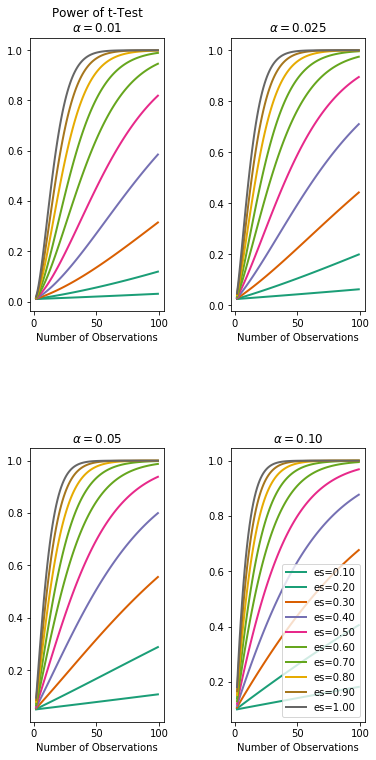

In [6]:
# power vs. number of observations for different significant level

fig = pyplot.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 100),
                                 effect_size=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,2,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 100),
                                 effect_size=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
                                 alpha=0.025,
                                 ax=ax, title=r'$\alpha = 0.025$') 
ax.get_legend().remove()
fig.subplots_adjust(top = 2.5, wspace = 0.5, hspace = 0.5)

ax = fig.add_subplot(2,2,3)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 100),
                                 effect_size=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')
ax.get_legend().remove()
ax = fig.add_subplot(2,2,4)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 100),
                                 effect_size=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
                                 alpha=0.10,
                                 ax=ax, title=r'$\alpha = 0.10$') 
